In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/employeee.csv')
df

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,offtime,employeeid,department
0,Bachelors,2017,Ratu road,3,34,Male,No,0,7,EMP0001,Marketing
1,Bachelors,2013,Lalpur,1,28,Female,No,3,2,EMP0002,Finance
2,Bachelors,2014,kanke,3,38,Female,No,2,11,EMP0003,IT
3,Masters,2016,Ratu road,3,27,Male,No,5,8,EMP0004,IT
4,Masters,2017,Lalpur,3,24,Male,Yes,2,11,EMP0005,Sales
...,...,...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Ratu road,3,26,Female,No,4,1,EMP4649,HR
4649,Masters,2013,Lalpur,2,37,Male,No,2,4,EMP4650,Sales
4650,Masters,2018,kanke,3,27,Male,No,5,12,EMP4651,IT
4651,Bachelors,2012,Ratu road,3,30,Male,Yes,2,6,EMP4652,Marketing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  4653 non-null   object
 1   joiningyear                4653 non-null   int64 
 2   city                       4653 non-null   object
 3   paymenttier                4653 non-null   int64 
 4   age                        4653 non-null   int64 
 5   gender                     4653 non-null   object
 6   everbenched                4653 non-null   object
 7   experienceincurrentdomain  4653 non-null   int64 
 8   offtime                    4653 non-null   int64 
 9   employeeid                 4653 non-null   object
 10  department                 4653 non-null   object
dtypes: int64(5), object(6)
memory usage: 400.0+ KB


In [ ]:
df.isnull().sum()

education                    0
joiningyear                  0
city                         0
paymenttier                  0
age                          0
gender                       0
everbenched                  0
experienceincurrentdomain    0
offtime                      0
employeeid                   0
department                   0
dtype: int64

In [ ]:
df.shape

(4653, 11)

In [ ]:
df['joiningyear'].value_counts()

joiningyear
2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: count, dtype: int64

<Axes: xlabel='joiningyear', ylabel='count'>

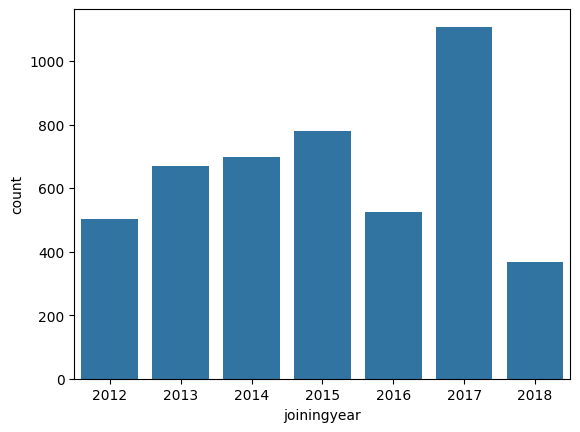

In [ ]:
sns.countplot(x='joiningyear',data=df)

<Axes: xlabel='paymenttier', ylabel='count'>

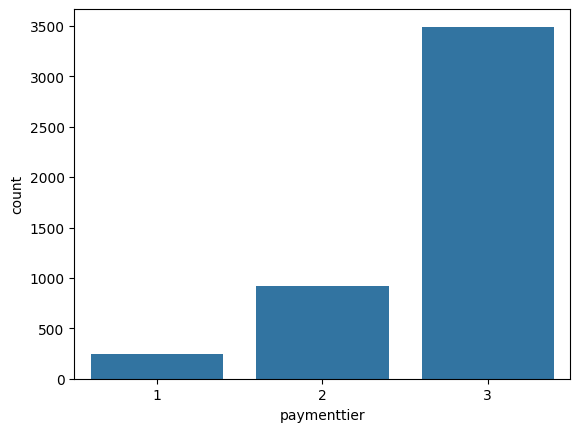

In [ ]:
sns.countplot(x='paymenttier',data=df)

<Axes: xlabel='experienceincurrentdomain', ylabel='count'>

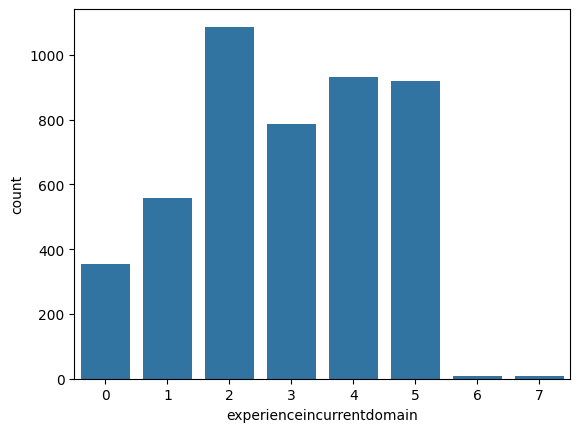

In [ ]:
sns.countplot(x='experienceincurrentdomain',data=df)

<Axes: xlabel='offtime', ylabel='count'>

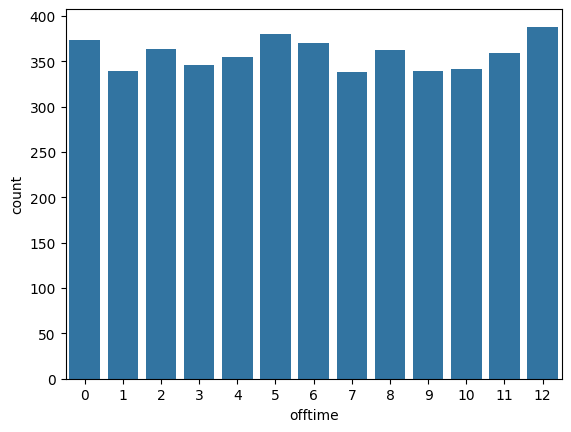

In [ ]:
sns.countplot(x='offtime',data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [ ]:
df.head()

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,offtime,employeeid,department
0,Bachelors,5,Ratu road,3,34,Male,No,0,7,EMP0001,Marketing
1,Bachelors,1,Lalpur,1,28,Female,No,3,2,EMP0002,Finance
2,Bachelors,2,kanke,3,38,Female,No,2,11,EMP0003,IT
3,Masters,4,Ratu road,3,27,Male,No,5,8,EMP0004,IT
4,Masters,5,Lalpur,3,24,Male,Yes,2,11,EMP0005,Sales


In [ ]:
# Identify non-numerical columns
for col in df.iloc[:, 1:11].columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' contains non-numerical values.")

# Option 1: Drop non-numerical columns
df_numeric = df.iloc[:, 1:11].select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

# Option 2: Encode categorical columns (if they represent ordinal data)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in df.iloc[:, 1:11].columns:
    if df[col].dtype == 'object':
        df[col] = labelencoder.fit_transform(df[col])

correlation_matrix = df.iloc[:, 1:11].corr()
print(correlation_matrix)

Column 'city' contains non-numerical values.
Column 'gender' contains non-numerical values.
Column 'everbenched' contains non-numerical values.
Column 'employeeid' contains non-numerical values.
Column 'department' contains non-numerical values.
                           joiningyear  paymenttier       age  \
joiningyear                   1.000000    -0.096078  0.013165   
paymenttier                  -0.096078     1.000000  0.007631   
age                           0.013165     0.007631  1.000000   
experienceincurrentdomain    -0.036525     0.018314 -0.134643   
offtime                       0.003975    -0.008447 -0.013126   

                           experienceincurrentdomain   offtime  
joiningyear                                -0.036525  0.003975  
paymenttier                                 0.018314 -0.008447  
age                                        -0.134643 -0.013126  
experienceincurrentdomain                   1.000000 -0.006123  
offtime                               

<Axes: >

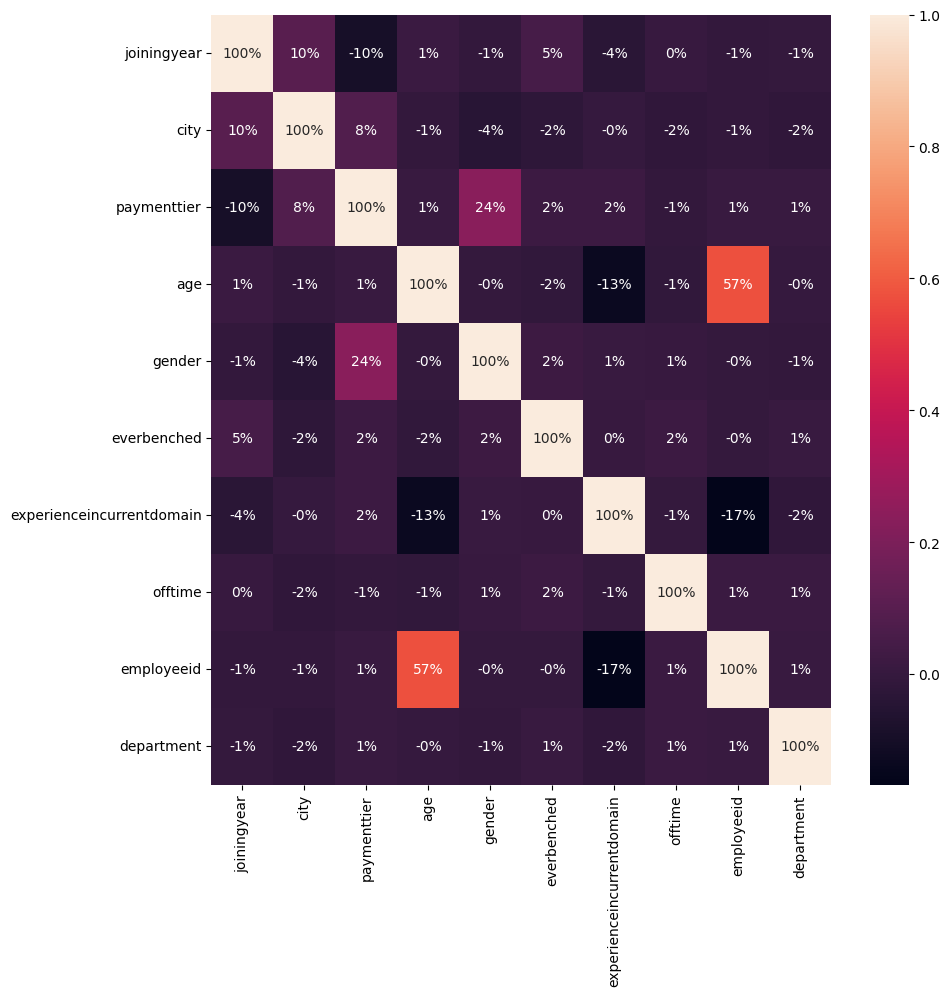

In [ ]:
#VISUALIZING THE C0-RELATION
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:11].corr(),annot=True,fmt='.0%')

<Axes: >

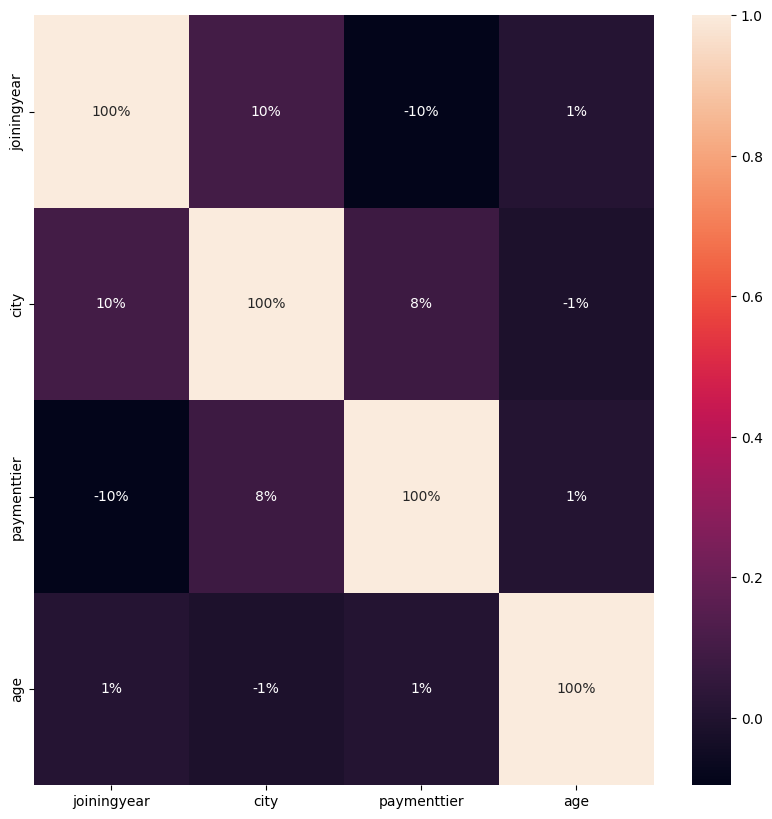

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:5].corr(),annot=True,fmt='.0%')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  4653 non-null   object
 1   joiningyear                4653 non-null   int64 
 2   city                       4653 non-null   int64 
 3   paymenttier                4653 non-null   int64 
 4   age                        4653 non-null   int64 
 5   gender                     4653 non-null   int64 
 6   everbenched                4653 non-null   int64 
 7   experienceincurrentdomain  4653 non-null   int64 
 8   offtime                    4653 non-null   int64 
 9   employeeid                 4653 non-null   int64 
 10  department                 4653 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 400.0+ KB


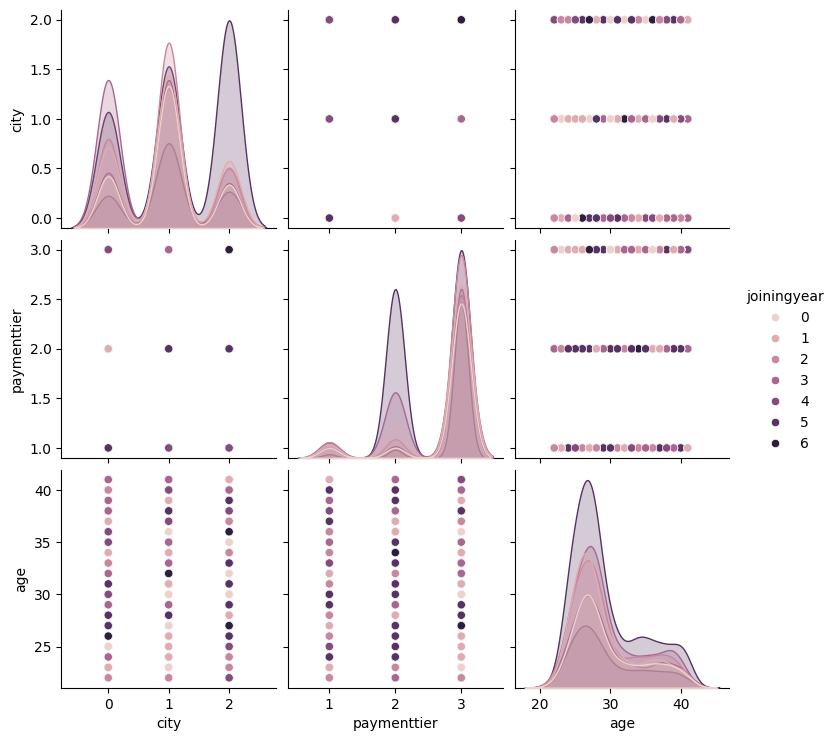

In [ ]:
sns.pairplot(df.iloc[:,1:5], hue='joiningyear')

In [ ]:
df.columns

Index(['education', 'joiningyear', 'city', 'paymenttier', 'age', 'gender',
       'everbenched', 'experienceincurrentdomain', 'offtime', 'employeeid',
       'department'],
      dtype='object')

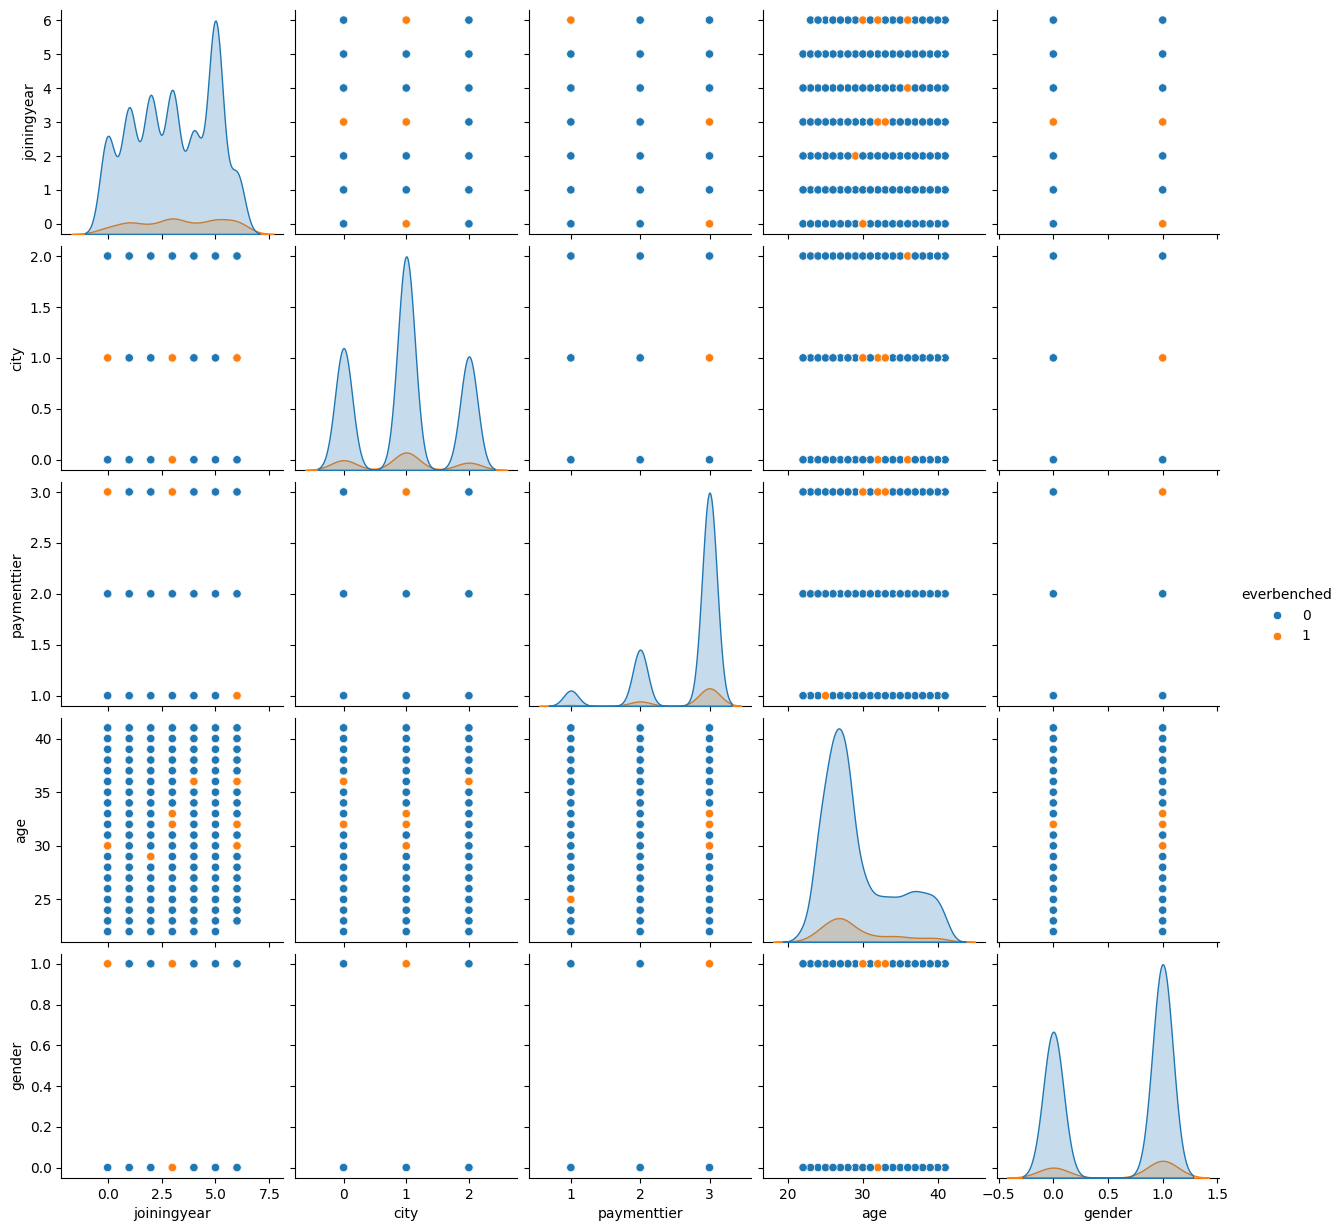

In [ ]:
sns.pairplot(df.iloc[:,1:7], hue='everbenched')

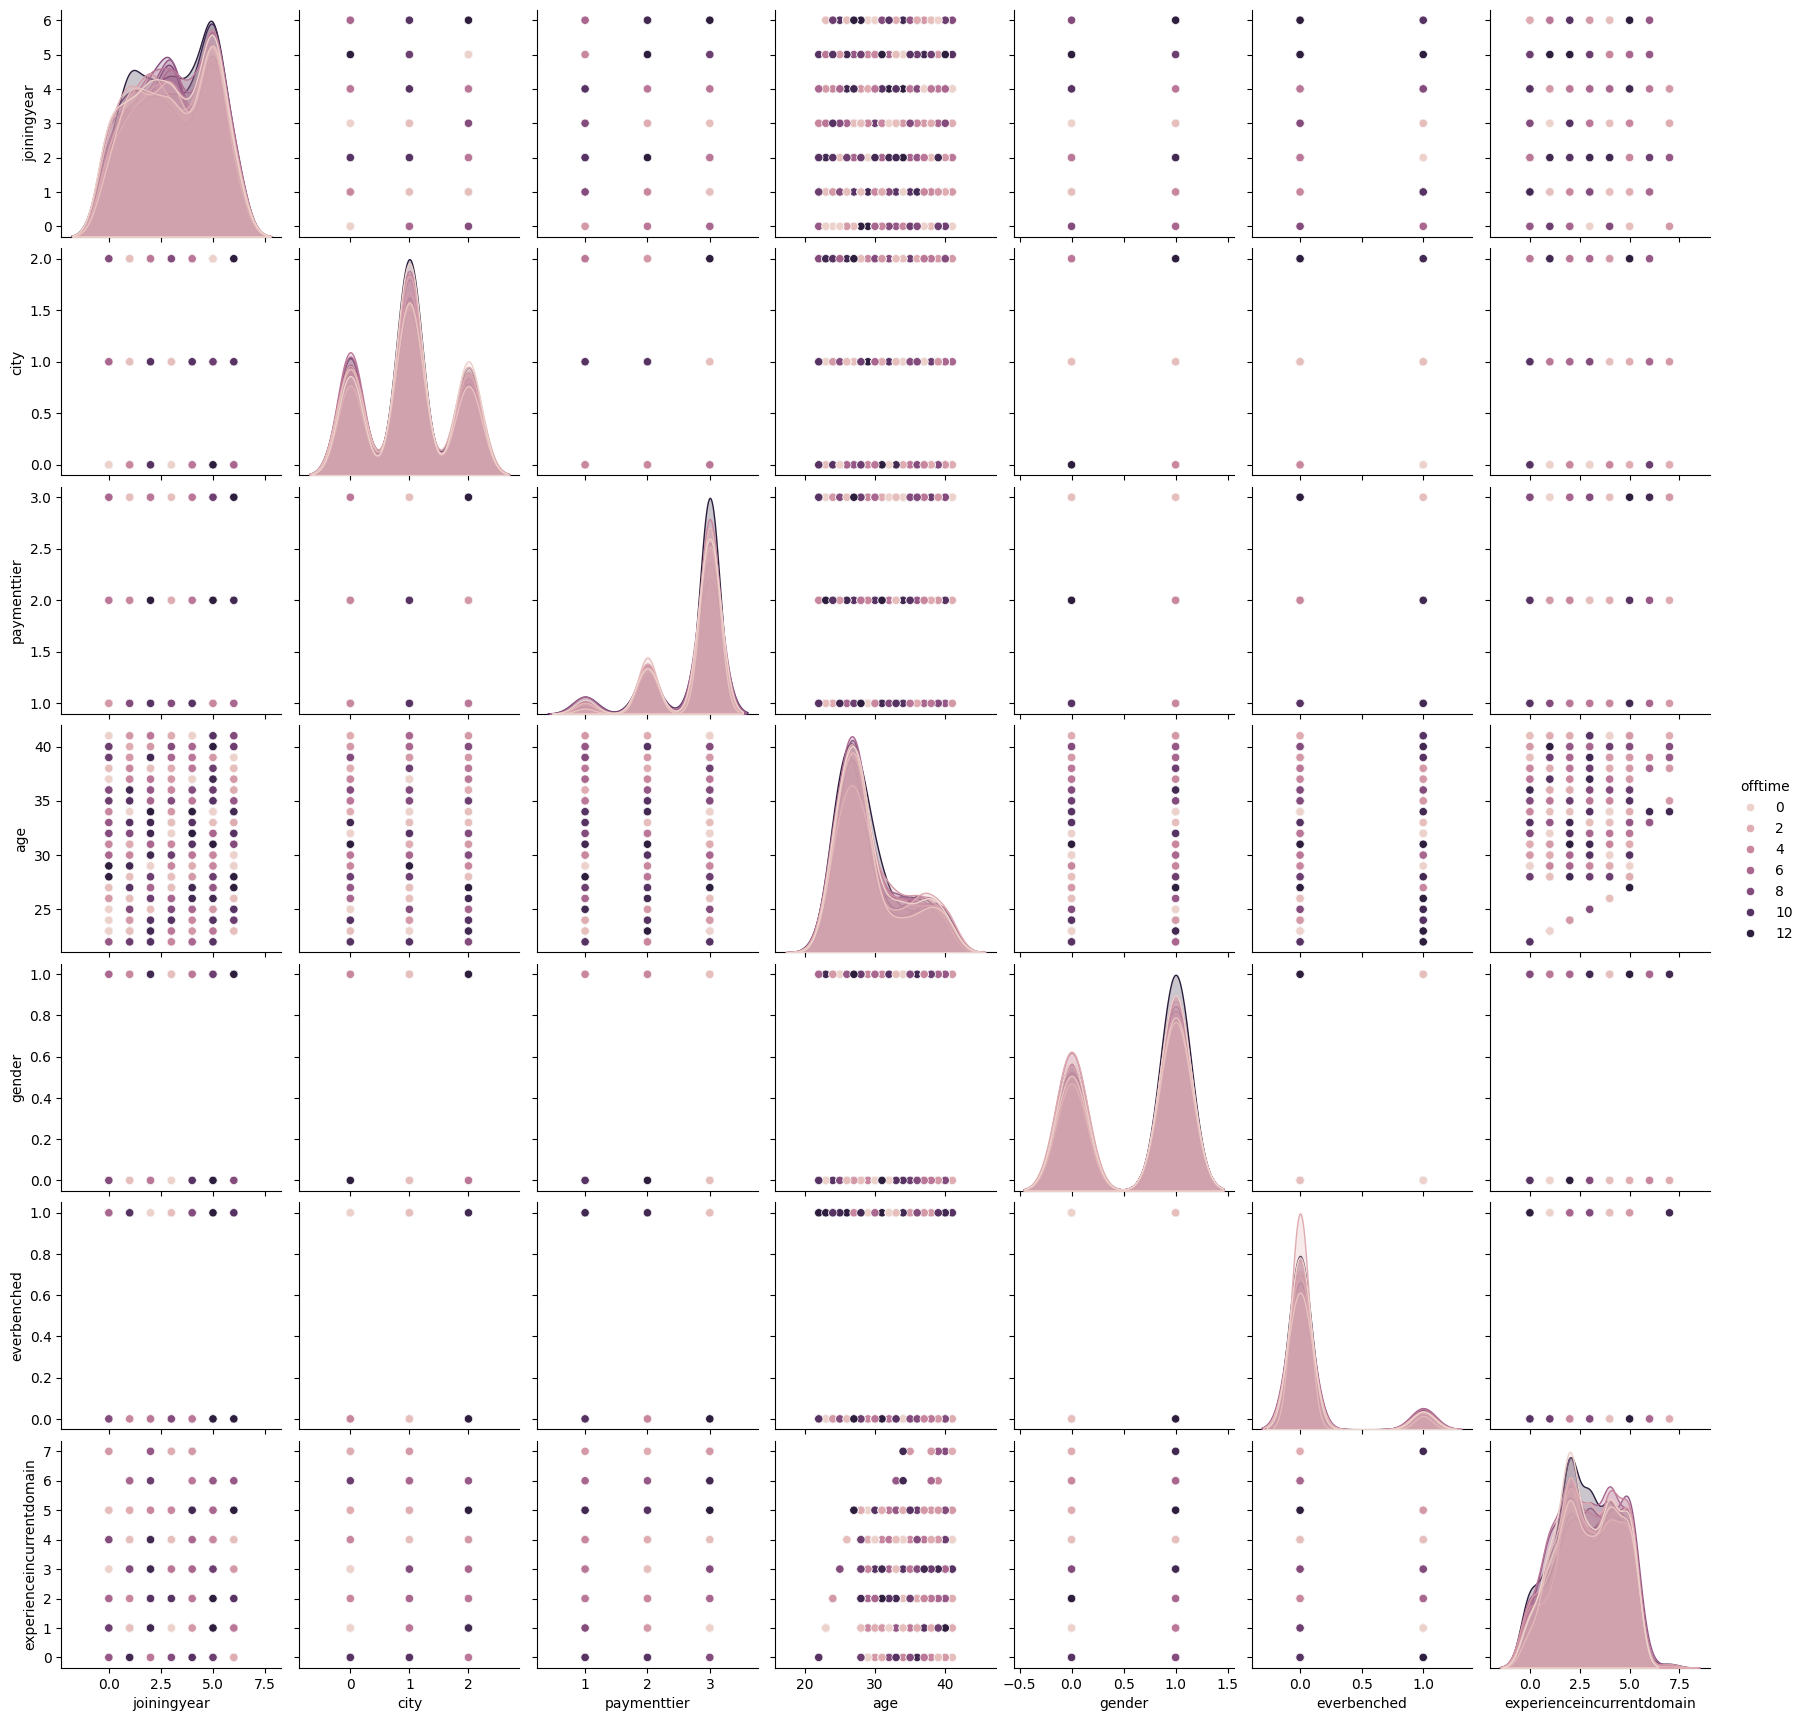

In [ ]:
sns.pairplot(df.iloc[:,1:9], hue='offtime')